<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_scores_csv = './sat_scores.csv'

In [3]:
print ('Opening File. Data:')
rows = []
with open(sat_scores_csv, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
f.close()
print('file closed')

Opening File. Data:
file closed


In [4]:
rows[:10]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500']]

In [5]:
#Split list rows to header and data
header = rows[0]
data = rows[1:]
print(header)

['State', 'Rate', 'Verbal', 'Math']


In [6]:
#Create a dictionary with data
sats_data = {column:[row[index] for row in data] for index, column in enumerate(header)}

In [7]:
sats_data.keys()

dict_keys(['State', 'Rate', 'Verbal', 'Math'])

In [8]:
print(sats_data['State'][:5])
print(sats_data['Rate'][:5])
print(sats_data['Verbal'][:5])
print(sats_data['Math'][:5])

['CT', 'NJ', 'MA', 'NY', 'NH']
['82', '81', '79', '77', '72']
['509', '499', '511', '495', '520']
['510', '513', '515', '505', '516']


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [9]:
satsdf1 = pd.DataFrame(sats_data)
satsdf1.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [10]:
satsdf1.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [11]:
#The columns of the DataFrame are of type 'object', ie. string 
#values.

In [12]:
#Making a pandas DataFrame object by loading from file
satsdf = pd.read_csv(sat_scores_csv)
satsdf.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [13]:
satsdf.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [14]:
#The columns of the DataFrame are of type int64.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [15]:
satsdf.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [16]:
#'Math' and 'Verbal' could be the average scores for Math and
#Language for the 'State'.
#Rate is the participation rate in the SATs.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [17]:
data_dictionary={'State': {'Type': satsdf['State'].dtypes,
                   'Desc': 'State Names.'},
           'Rate': {'Type': satsdf['Rate'].dtypes,
                    'Desc': 'SATs participation rates.'},
           'Verbal':{'Type': satsdf['Verbal'].dtypes,
                   'Desc': 'Average scores for Verbal Test'},
            'Math':{'Type': satsdf['Math'].dtypes,
                   'Desc': 'Average scores for Math Test'},
            'Shape': str(satsdf.shape[0])+ ' rows, ' + str(satsdf.shape[1])+ ' columns'
         }
data_dictionary

{'State': {'Type': dtype('O'), 'Desc': 'State Names.'},
 'Rate': {'Type': dtype('int64'), 'Desc': 'SATs participation rates.'},
 'Verbal': {'Type': dtype('int64'), 'Desc': 'Average scores for Verbal Test'},
 'Math': {'Type': dtype('int64'), 'Desc': 'Average scores for Math Test'},
 'Shape': '52 rows, 4 columns'}

In [18]:
str(satsdf.shape[0])

'52'

In [19]:
#Find the index and columns
print(satsdf.index)
print(satsdf.columns)

RangeIndex(start=0, stop=52, step=1)
Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')


In [20]:
#Find the dtypes of the columns
satsdf.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [21]:
#Find the dimensions
satsdf.shape

(52, 4)

In [22]:
satsdf.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [23]:
satsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [24]:
import seaborn as sns

Text(0, 0.5, 'Count')

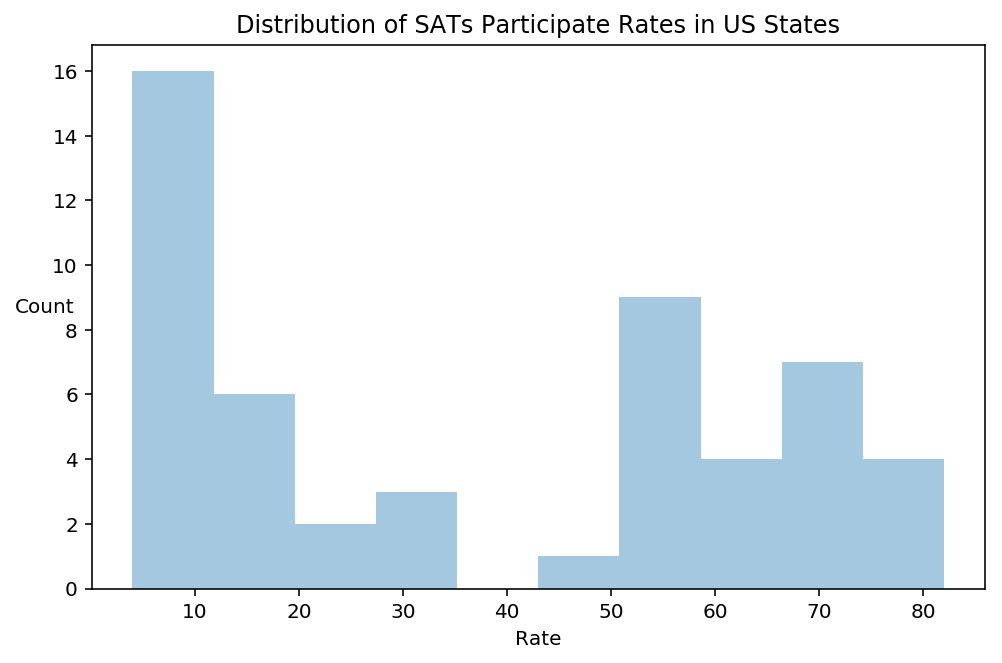

In [25]:
fig = plt.figure(figsize =(8,5))

ax = sns.distplot(satsdf['Rate'],bins=10, kde=False)

ax.set_title ('Distribution of SATs Participate Rates in US States')
ax.set_ylabel('Count', rotation=0)

Text(0, 0.5, 'Count')

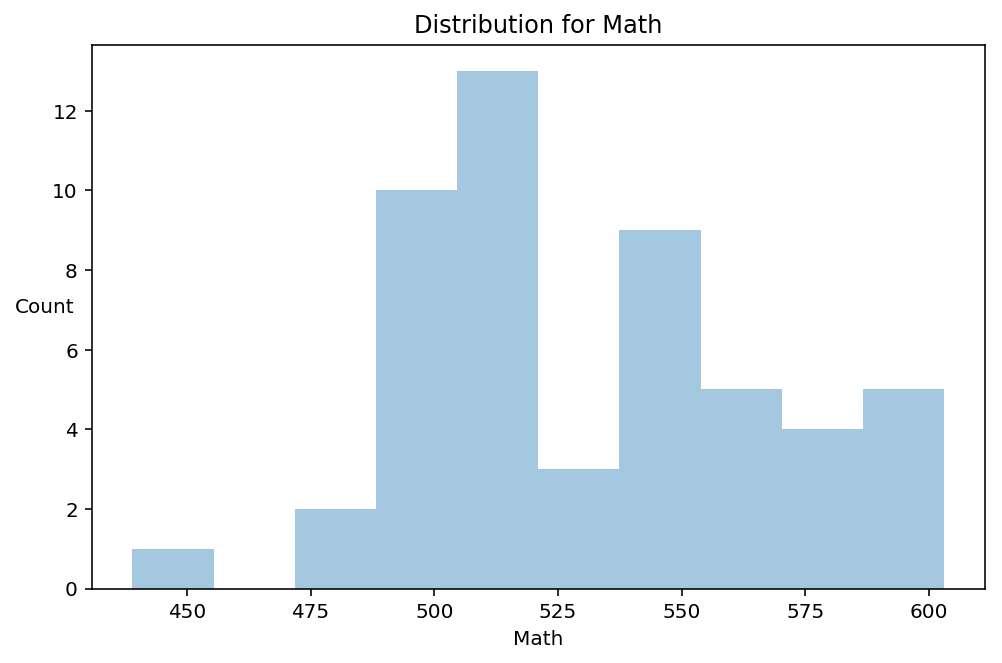

In [26]:
fig = plt.figure(figsize =(8,5))

ax = sns.distplot(satsdf['Math'],bins =10, kde=False);
ax.set_title('Distribution for Math')
ax.set_ylabel('Count', rotation=0)


Text(0, 0.5, 'Count')

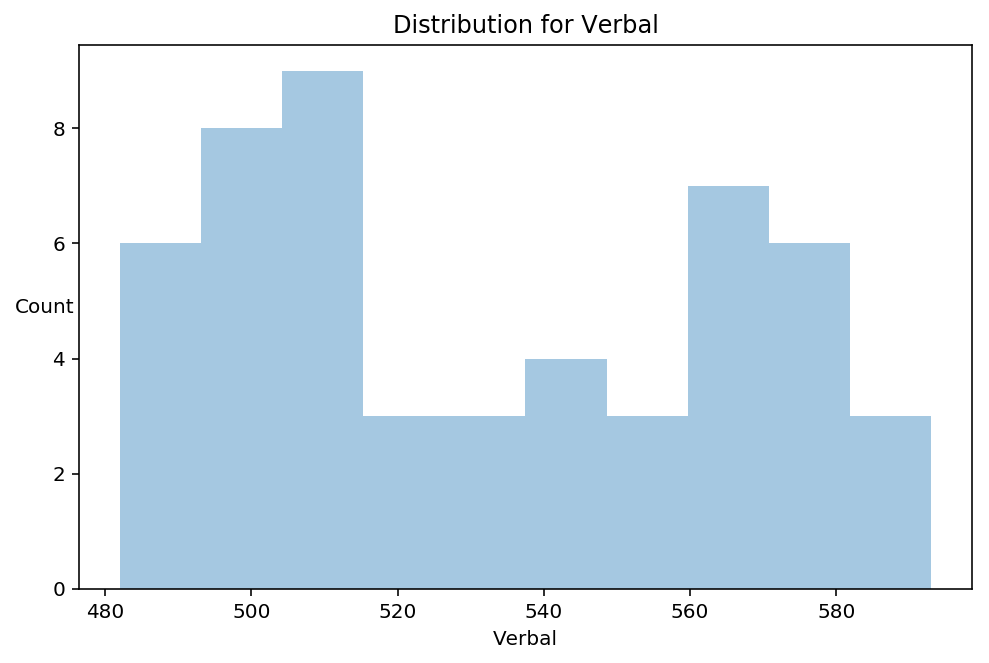

In [27]:
fig = plt.figure(figsize =(8,5))

ax = sns.distplot(satsdf['Verbal'],bins =10, kde=False);
ax.set_title('Distribution for Verbal')
ax.set_ylabel('Count', rotation=0)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

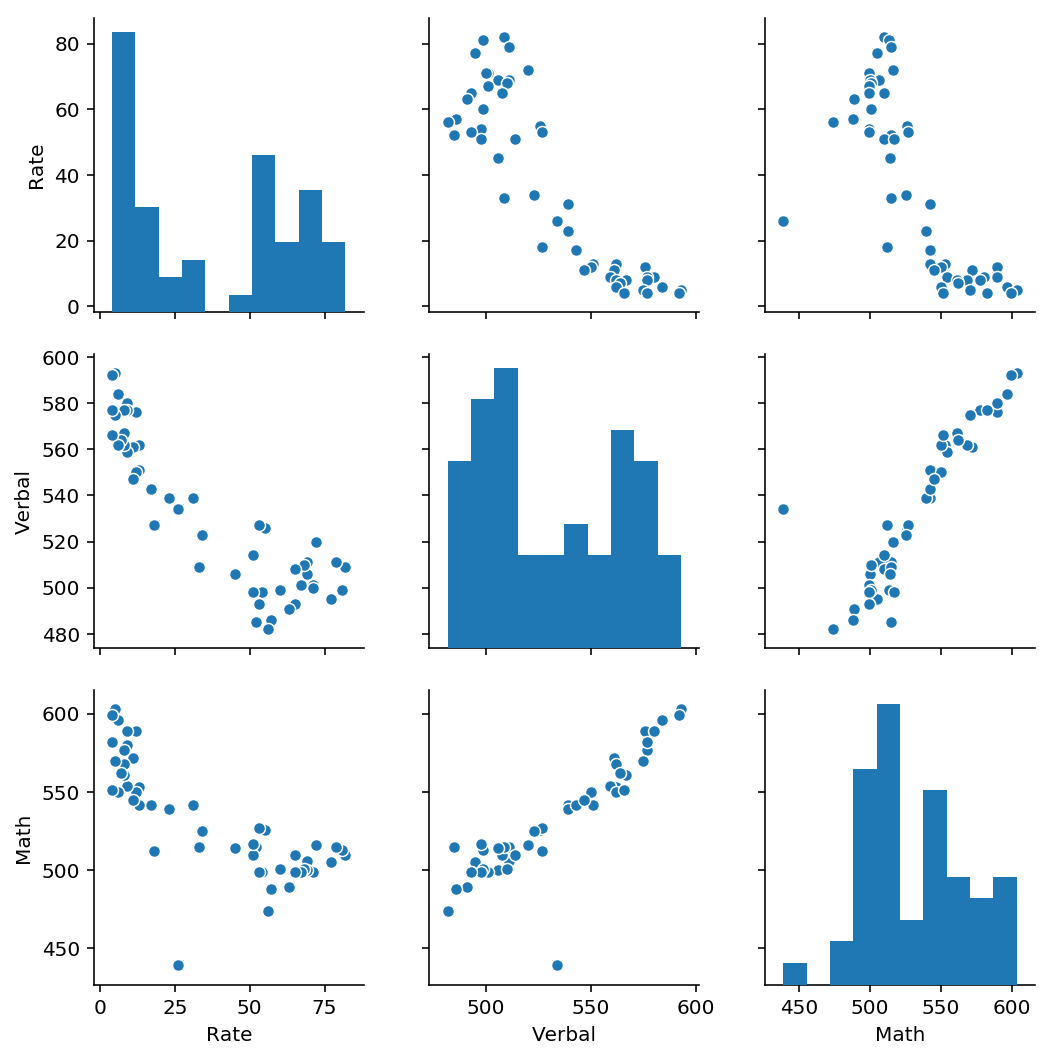

In [28]:
sns.pairplot(satsdf, vars= ['Rate', 'Verbal','Math'])

In [29]:
#The pairs plot above shows:
#The histogram on the diagonal shows the univariate distribution of 'Rate',
#'Verbal' and Math'
#The scatter plots on the upper and lower triangles show the relationships between 
#two variables: Rate-Math,Rate-Verbal, Verbal-Math, etc
#From the pair plots, we see that 'Math' and 'Verbal' are positively correlated 
# showing that people who do well in Math also tend to do well in Verbal.
#From the Rate-Math, Rate-Verbal pair plots, it's strange to to see that when Rate 
#increases, the Rate and Math scores decreases.
#From the Rate histogram, it seems that 'Rate' are not uniformly distributed
#across the states. A quick research shows that there is another test 'ACT' and some
#states in US participate more in ACT than SAT. 
#Insights : In states where 'ACT' tests are the norm, only the better students will
#take up additional 'SAT' tests, and hence pulling up the State's average scores for
#Math and Verbal.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0, 0.5, 'frequency')

<Figure size 1152x1152 with 0 Axes>

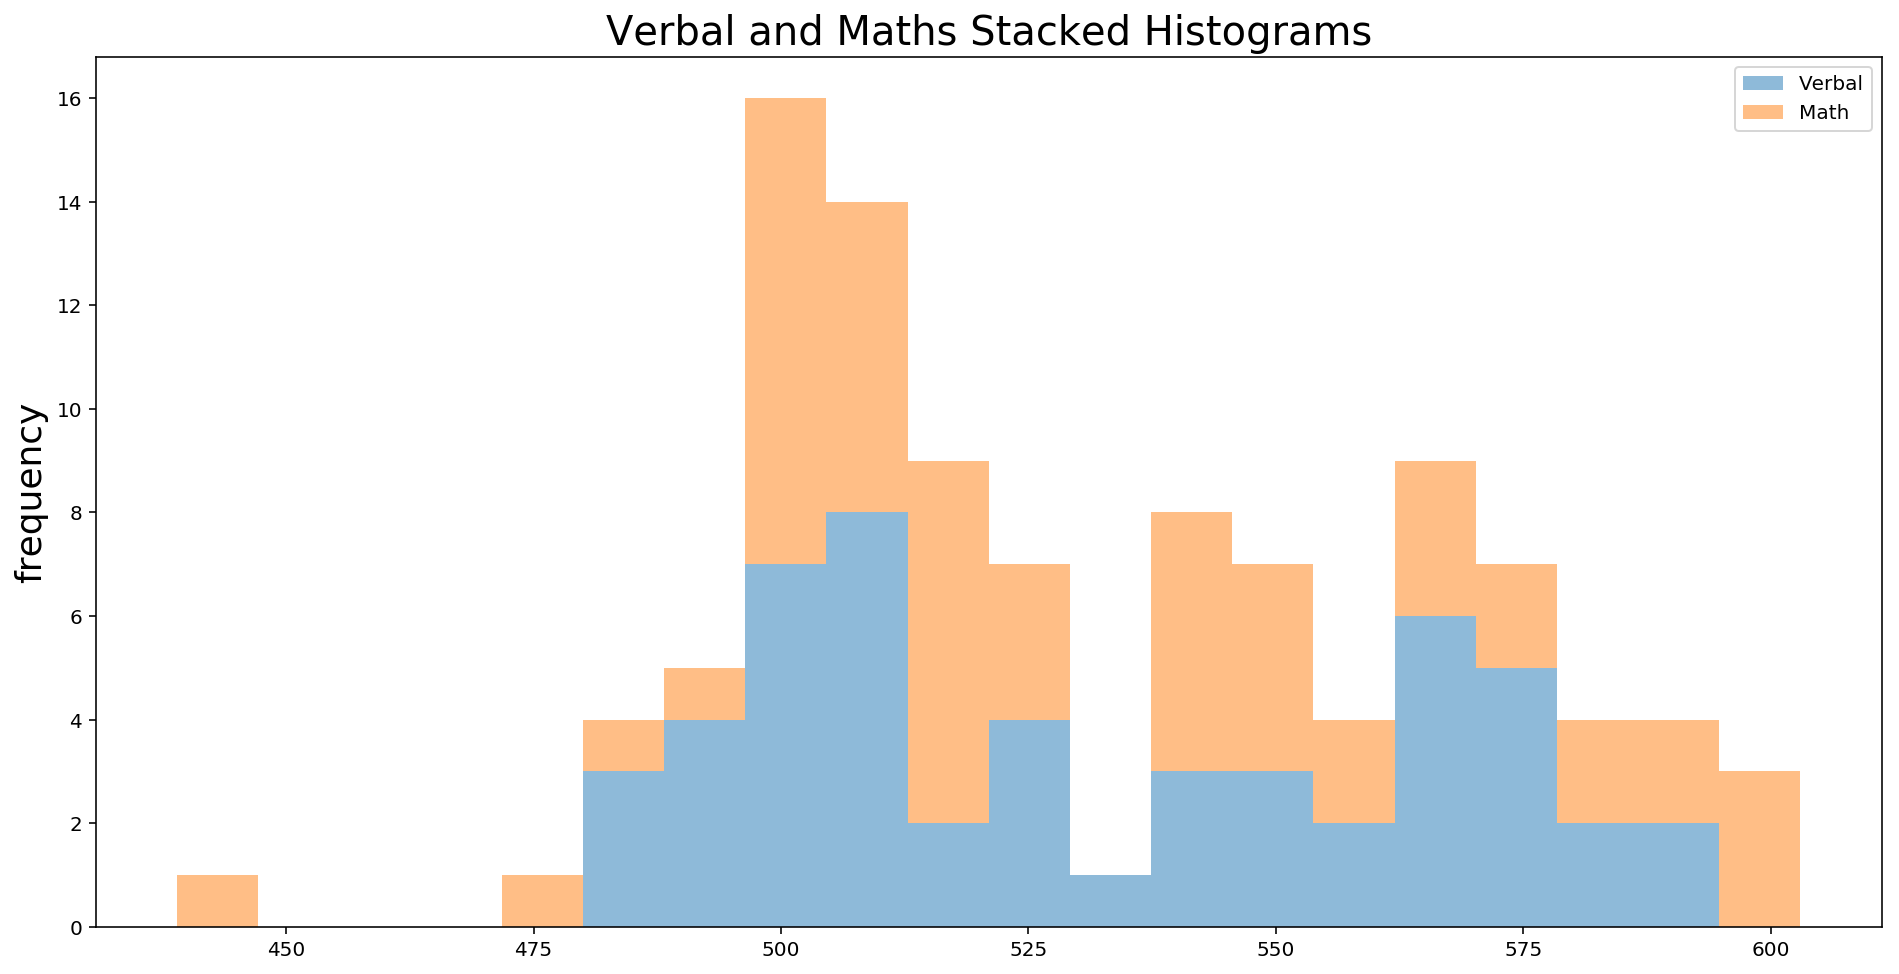

In [30]:
fig = plt.figure(figsize =(16,16))
ax = satsdf[['Verbal', 'Math']].plot.hist(stacked=True,bins=20,alpha =0.5, figsize =(16,8))
ax.set_title('Verbal and Maths Stacked Histograms', fontsize =20)
ax.set_ylabel('frequency', fontsize =18)


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

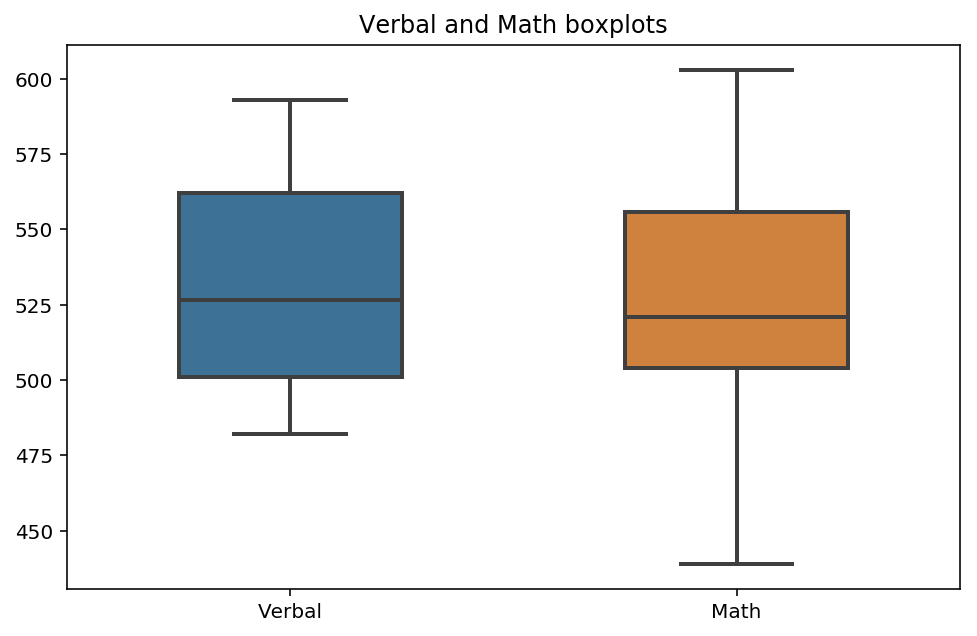

In [31]:
fig = plt.figure(figsize =(8,5))
ax = sns.boxplot(data=satsdf[['Verbal','Math']], width = 0.5, linewidth=2, saturation=0.6)
ax.set_title('Verbal and Math boxplots');

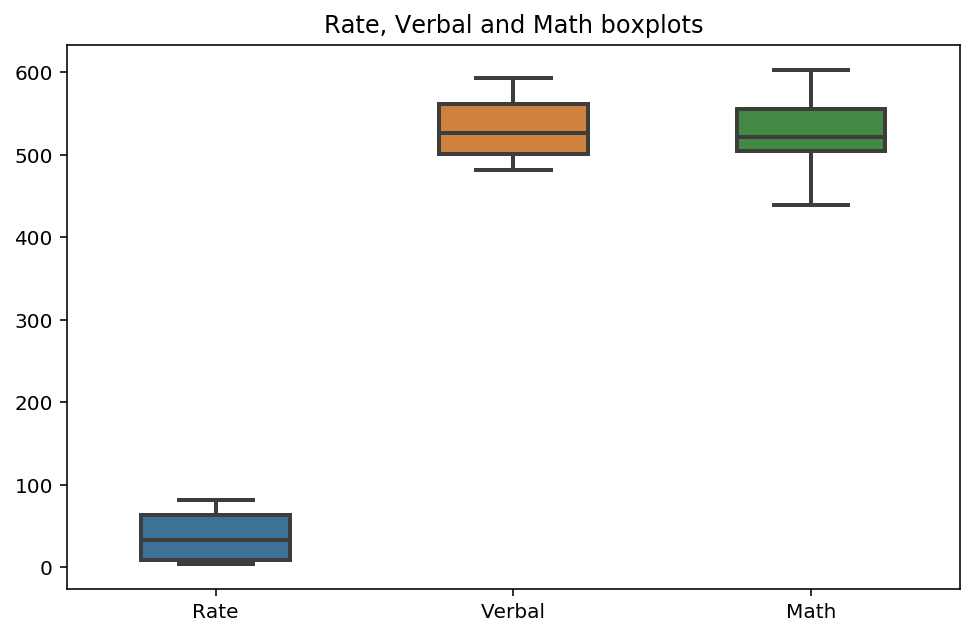

In [32]:
fig = plt.figure(figsize =(8,5))
ax = sns.boxplot(data=satsdf[ ['Rate', 'Verbal','Math']], width = 0.5, linewidth=2, saturation=0.6)
ax.set_title('Rate, Verbal and Math boxplots');

In [33]:
#A boxplot can show the variable's median and spread and outliers.
#Plotting boxplots side by side allows us to do a quick comparision.
# However, it's not appropriate to plot Rate with Verbal & Math. This is
# because Rate is a percentage score while Math & Verbal are scores ranging
#from 450 to 600. They do not have the same scale.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [34]:
# import matplotlib.pyplot as plt
# ax = satsdf.boxplot() 
# # plt.figure()
# # plt.boxplot(satsdf)
# # plt.xscale('log')
# ax.set_yscale('log')
# # plt.autoscale(True)
# # plt.show() 

#We can carry out a 'standardization' process to force the distribution of each
#variable to have a mean of 0 and a standard deviation of 1.
sats_RVM = satsdf[['Rate', 'Verbal', 'Math']]
df_norm = (sats_RVM - sats_RVM.mean())/(sats_RVM.std())

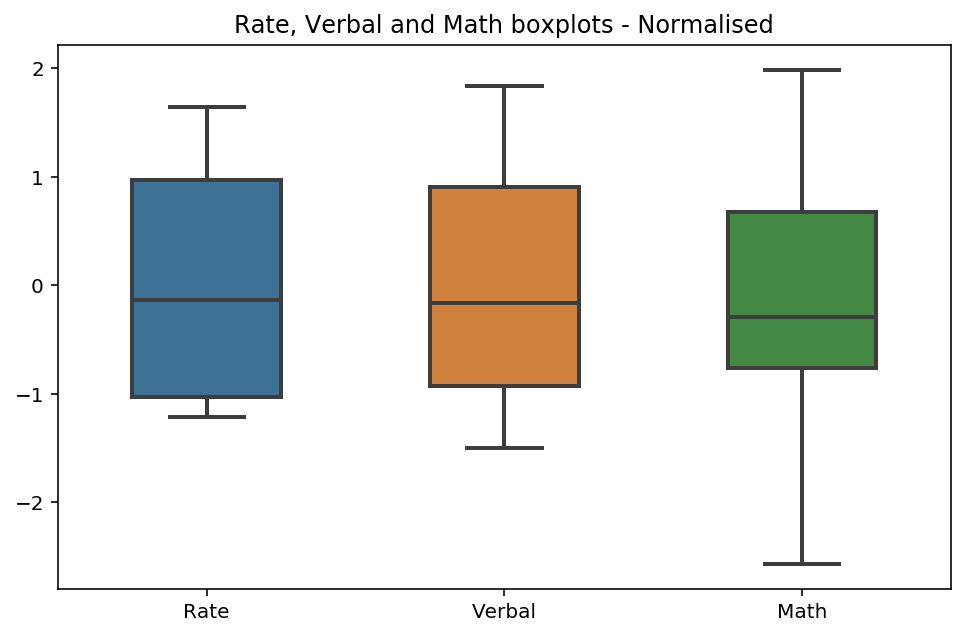

In [35]:
fig = plt.figure(figsize =(8,5))

ax = sns.boxplot(data=df_norm, width = 0.5, linewidth=2, saturation=0.6)
ax.set_title('Rate, Verbal and Math boxplots - Normalised');


# The three variables Rate, Math and Verbal can now be shown in the same
# box plot using normalised scale.

In [36]:
# ax = satsdf.boxplot() #change the scale
# ax.set_yscale()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [37]:
statesAboveMean= list(satsdf[satsdf['Verbal']>satsdf['Verbal'].mean()]['Verbal'])

In [38]:
print(statesAboveMean)
print("States above mean: {}".format(len(statesAboveMean)))

[539, 534, 539, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566]
States above mean: 24


In [39]:
#24 states have Verbal scores greater than average of Verbal scores
#across states. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [40]:
statesAboveMed= list(satsdf[satsdf['Verbal']>satsdf['Verbal'].median()]['Verbal'])

In [41]:
print(statesAboveMed)
print(len(statesAboveMed))

[527, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566]
26


In [42]:
#26 states have Verbal scores greater than the median of Verbal scores
#across states. The mean Verbal score is slightly higher than the median implying that the data is 
# slightly right (positive) skewed.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [43]:
satsdf['Verbal-Math'] = satsdf['Verbal']-satsdf['Math']
satsdf.head()

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [44]:
#Sort sats dataframe in descending order and rename the
#index from 1
df1 = satsdf.sort_values(['Verbal-Math'], ascending = False).head(10)
new_index_values= list(range(1,df1.shape[0]+1))
df1.index = new_index_values
print('Top 3 states with greatest gap between Verbal and Math scores (Verbal > Math):')
df1.head(3)


Top 3 states with greatest gap between Verbal and Math scores (Verbal > Math):


,State,Rate,Verbal,Math,Verbal-Math
1,OH,26,534,439,95
2,MS,4,566,551,15
3,WV,18,527,512,15


In [45]:
#Sort sats dataframe in ascending order and rename the
#index from 1
df2 = satsdf.sort_values(['Verbal-Math'], ascending = True).head(10)

new_index_values= list(range(1,df2.shape[0]+1))
df2.index = new_index_values
print('Top 3 states with greatest gap between Verbal and Math scores (Verbal < Math):')
print(df2.head(3))

Top 3 states with greatest gap between Verbal and Math scores (Verbal < Math):
  State  Rate  Verbal  Math  Verbal-Math
1    HI    52     485   515          -30
2    CA    51     498   517          -19
3    NJ    81     499   513          -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [46]:
#Obtain the correlation matrix of the sats subset excluding
#'State'
#sats_RVM = satsdf[['Rate', 'Verbal', 'Math']]
sats_RVM.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


In [47]:
#Math and Verbal have strong positive correlation.
#To_Do
#Rate has quite strong negative correlation with 'Verbal' and 'Math'.
#This is probably because students in some States take the ACT as their main exam and not 
#SATS, and if they do take SATS exam, they are likely to be the top students who also take
#ACT. This thus account for low Rate but high Verbal and Math scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [48]:
satsdf.describe(include = 'all')

,State,Rate,Verbal,Math,Verbal-Math
count,52,52.000000,52.000000,52.000000,52.000000
unique,52,NaN,NaN,NaN,NaN
top,OR,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,37.153846,532.019231,531.500000,0.519231
std,NaN,27.301788,33.236225,36.014975,15.729939
min,NaN,4.000000,482.000000,439.000000,-30.000000
25%,NaN,9.000000,501.000000,504.000000,-6.000000
50%,NaN,33.500000,526.500000,521.000000,0.000000
75%,NaN,63.500000,562.000000,555.750000,4.250000


There are some potential outliers in the variables here:
1. 'Rate' has at least one outlier at the min end of the range
2. 'Verbal-Math' has at least one outlier at the min end and one outlier at the max end of the range, meaning there is an instance of large positive and negative gap between the two scores.

Half of the sample population shows 'Verbal' scores better than 'Math'.
There are no missing data since counts of all columns are 52.

Mean values of 'Rate', 'Verbal' and 'Math' are slightly higher than their respective Median values. This implies a slight positive(or right skew).

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [49]:
sats_RVM.cov()

# The covariance matrix measures the 'relatedness' between two variables. 
# While it indicates if two variables are positivily or negatively related, 
# it does not help when we want to compare the degree of relatedness for each data
# pairs.
# The correlation matrix is computed from the covariance and the 
# correlation value ranges from -1 to 1. Since correlation values are 
# normalised, it is easy to compare the relationships even if the variables are 
# of different scales.
# Hence it is preferable to use correlation matrix over covariance matrix to 
# interpret the relationships between variables.

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [50]:
drugs_file = './drug-use-by-age.csv'

In [51]:
drugs = pd.read_csv(drugs_file)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### 7.2.1 Describing the Basic Format of the Data and the Columns

In [52]:
#Print out the firt eight rows:
drugs.head(8)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0


In [53]:
#Print out the last 5 rows
drugs.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [54]:
#Find the dimension of the data
drugs.shape

(17, 28)

In [55]:
#Look at the dtypes of the columns:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [56]:
# The following 6 columns have an 'object' type indicating they are strings
# cocaine-frequency, crack-frequency, heroin-frequency,inhalant-frequency
# oxycontin-frequency,meth-frequency
# The corresponding data for other drug types are float and hence we
# infer that the data for the above should be numeric as well.
# The feature set 'n' could be the number of counts for each sample by age. Though
# the age groups are not divided on the common scale , it is sufficient for our 
# analysis using the percentage use, hence it is ok to drop the feature 'n'.

### 7.2.2 Cleaning the Corrupted Columns

In [57]:
errorColumns =['cocaine-frequency', 'crack-frequency', 'heroin-frequency',
               'inhalant-frequency','oxycontin-frequency', 'meth-frequency']

In [58]:
#These columns contain invalid entry of '-'
for i in errorColumns: 
    print(i, ' :',  drugs[i].values)

cocaine-frequency  : ['5.0' '1.0' '5.5' '4.0' '7.0' '5.0' '5.0' '5.5' '8.0' '5.0' '5.0' '6.0'
 '5.0' '8.0' '15.0' '36.0' '-']
crack-frequency  : ['-' '3.0' '-' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '5.0' '6.0'
 '6.0' '15.0' '48.0' '62.0' '-']
heroin-frequency  : ['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']
inhalant-frequency  : ['19.0' '12.0' '5.0' '5.5' '3.0' '4.0' '4.0' '3.0' '4.0' '2.0' '4.0' '2.0'
 '4.0' '3.5' '10.0' '13.5' '-']
oxycontin-frequency  : ['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '13.5' '46.0' '12.0' '5.0' '-']
meth-frequency  : ['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '12.0' '2.0' '46.0'
 '21.0' '30.0' '54.0' '104.0' '30.0' '-']


Since the dataset is small, we will retain all good values and replace the the '-' with the mean of the valid data in the corresponding columns

In [59]:
#Since the dataset is small and only few columns have invalid
#data, we retain the '-' value of these columns by replacing
#it with np.nan, and convert other numeric strings to float
for i in errorColumns: 
    drugs[i] = drugs[i].map(lambda x:np.nan if x == '-' else float(x))

In [60]:
#Check thal all '-' are replaced with np.nan
for i in errorColumns: 
    print(i, ' :',  drugs[i].values)

cocaine-frequency  : [ 5.   1.   5.5  4.   7.   5.   5.   5.5  8.   5.   5.   6.   5.   8.
 15.  36.   nan]
crack-frequency  : [ nan  3.   nan  9.5  1.  21.  10.   2.   5.  17.   5.   6.   6.  15.
 48.  62.   nan]
heroin-frequency  : [ 35.5   nan   2.    1.   66.5  64.   46.  180.   45.   30.   57.5  88.
  50.   66.  280.   41.  120. ]
inhalant-frequency  : [19.  12.   5.   5.5  3.   4.   4.   3.   4.   2.   4.   2.   4.   3.5
 10.  13.5  nan]
oxycontin-frequency  : [24.5 41.   4.5  3.   4.   6.   7.   7.5 12.  13.5 17.5 20.  13.5 46.
 12.   5.   nan]
meth-frequency  : [  nan   5.   24.   10.5  36.   48.   12.  105.   12.    2.   46.   21.
  30.   54.  104.   30.    nan]


In [61]:
#Look at the dtypes of the columns. 
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2.3. Describing Summary Statistics for Columns

In [62]:
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [63]:
drugs_use = drugs[['age', 'alcohol-use', 'marijuana-use',
                  'cocaine-use', 'crack-use', 'heroin-use',
                  'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',
                  'oxycontin-use','tranquilizer-use', 
                  'stimulant-use','meth-use', 'sedative-use']]
drugs_use.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [64]:
drugs_freq = drugs[['age', 'alcohol-frequency', 'marijuana-frequency',
                  'cocaine-frequency', 'crack-frequency', 'heroin-frequency',
                  'hallucinogen-frequency', 'inhalant-frequency', 'pain-releiver-frequency',
                  'oxycontin-frequency','tranquilizer-frequency', 
                  'stimulant-frequency','meth-frequency', 'sedative-frequency']]
drugs_freq.head()

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
1,13,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


In [65]:
drugs_use.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [66]:
drugs_freq.describe()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
count,17.000000,17.000000,16.000000,14.000000,16.000000,17.000000,16.000000,17.000000,16.000000,17.000000,17.000000,15.000000,17.000000
mean,33.352941,42.941176,7.875000,15.035714,73.281250,8.411765,6.156250,14.705882,14.812500,11.735294,31.147059,35.966667,19.382353
std,21.318833,18.362566,8.038449,18.111263,70.090173,15.000245,4.860448,6.935098,12.798275,11.485205,85.973790,31.974581,24.833527
min,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,7.000000,3.000000,4.500000,2.000000,2.000000,3.000000
25%,10.000000,30.000000,5.000000,5.000000,39.625000,3.000000,3.375000,12.000000,5.750000,6.000000,7.000000,12.000000,6.500000
50%,48.000000,52.000000,5.250000,7.750000,53.750000,3.000000,4.000000,12.000000,12.000000,10.000000,10.000000,30.000000,10.000000
75%,52.000000,52.000000,7.250000,16.500000,71.875000,4.000000,6.625000,15.000000,18.125000,11.000000,12.000000,47.000000,17.500000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.000000,364.000000,105.000000,104.000000


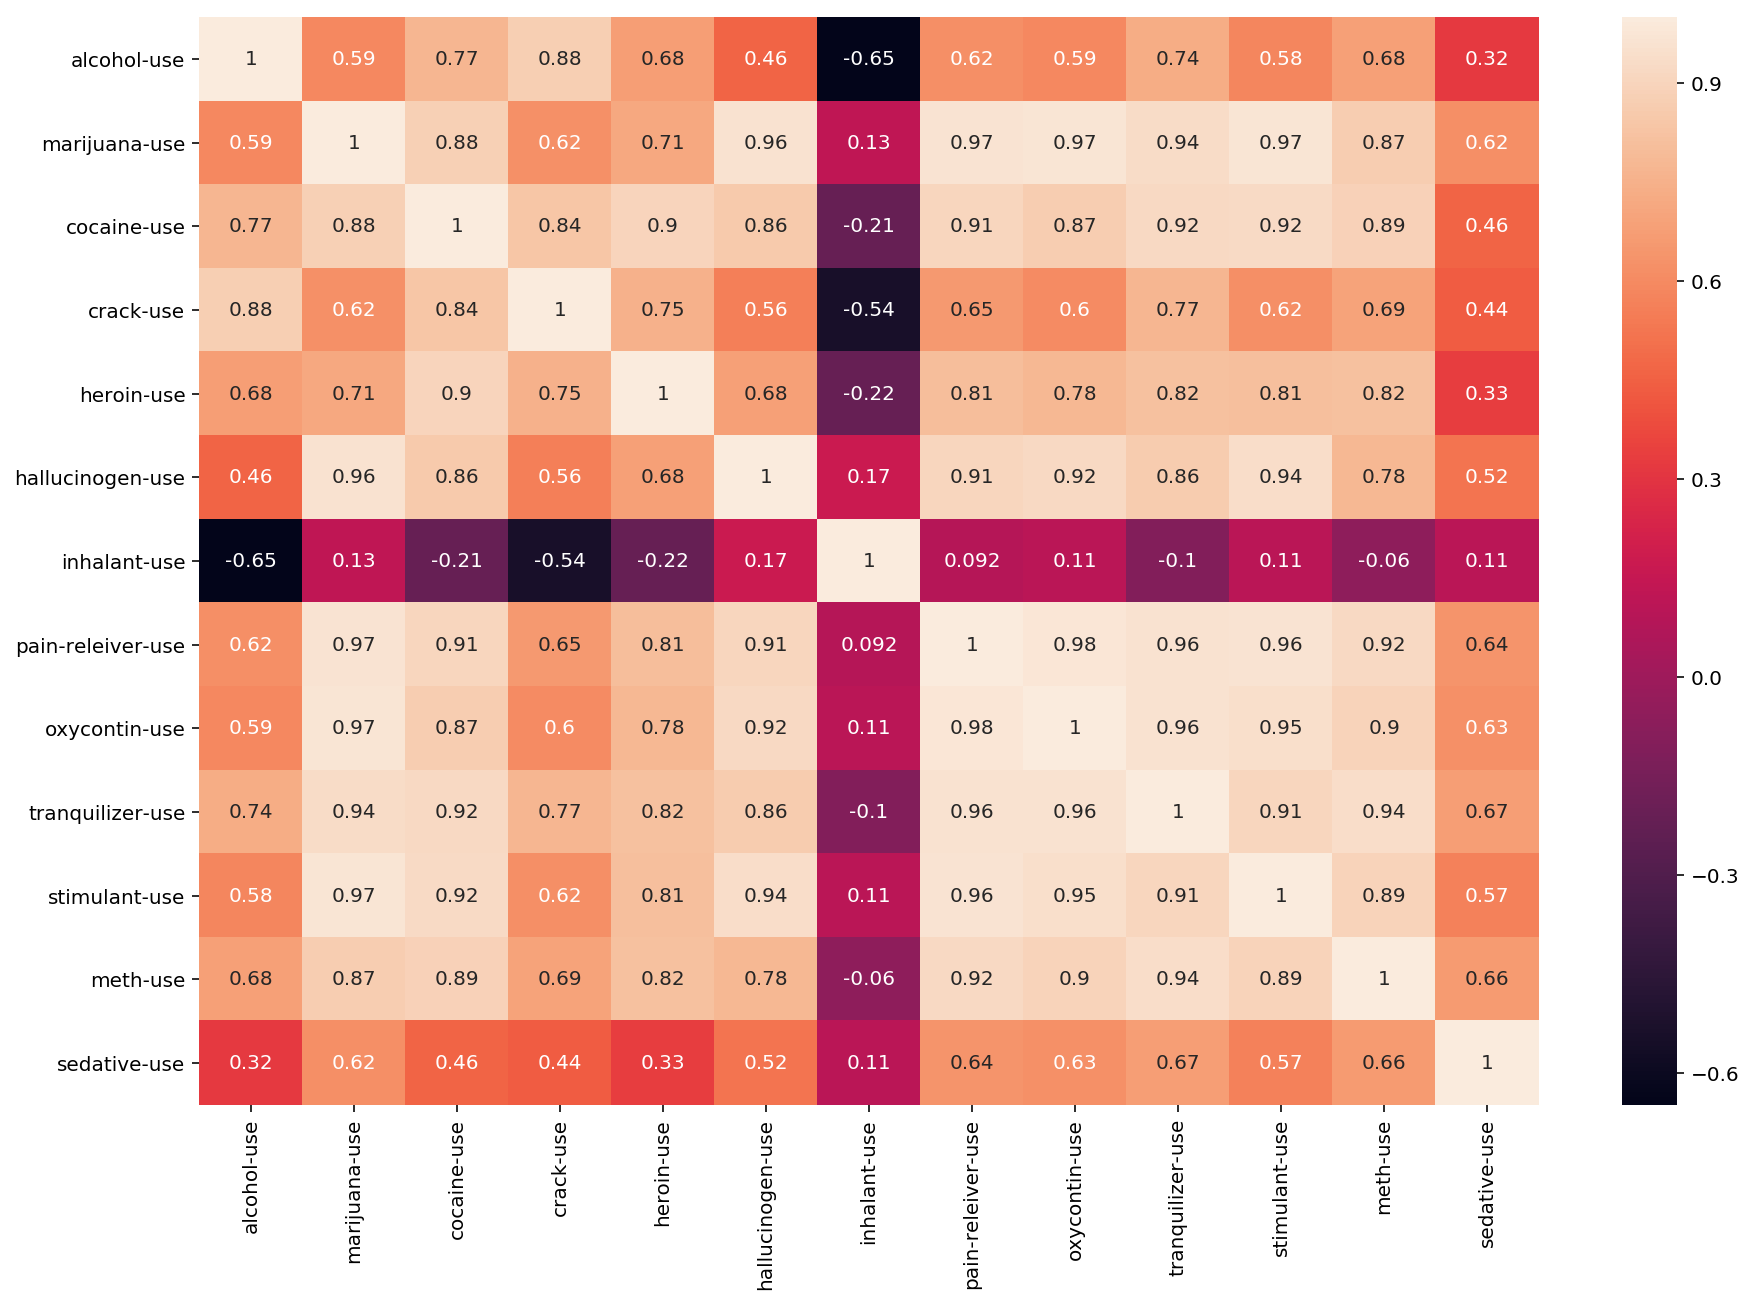

In [67]:
#Look at the correlation between all drugs-use
drugs_use_correlations = drugs_use.corr()
plt.figure(figsize=(15,10))
sns.heatmap(drugs_use_correlations, annot =True)


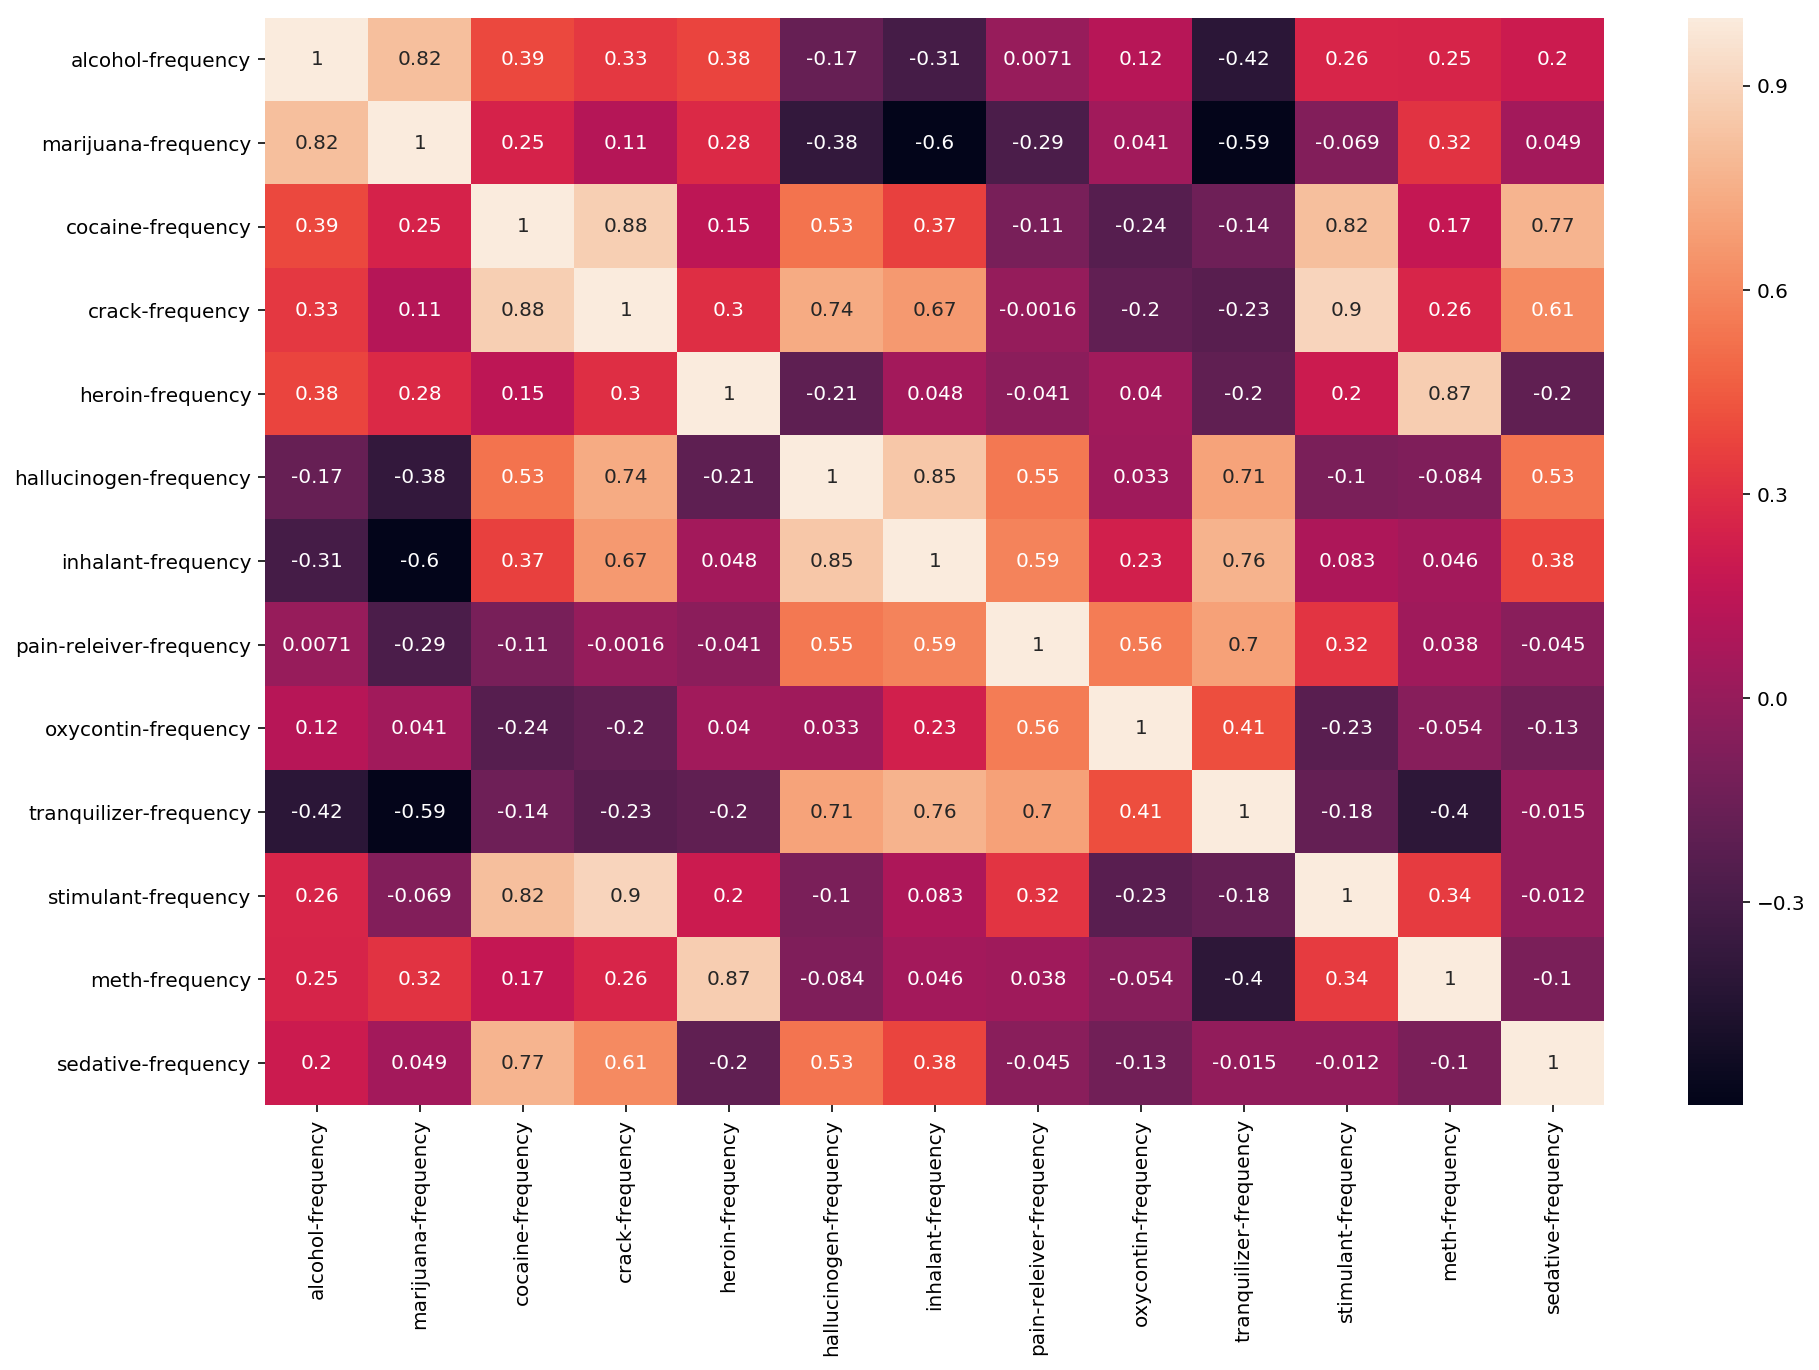

In [68]:
#Look at the correlation between all drugs-frequency
drugs_freq_correlations = drugs_freq.corr()
plt.figure(figsize=(15,10))
sns.heatmap(drugs_freq_correlations, annot = True)

## Insights:
#There is littel correlation between the frequency of abuse for the various drugs, 
#however, there is indication of strong correlation between the percentage of abuse amongst these drugs.

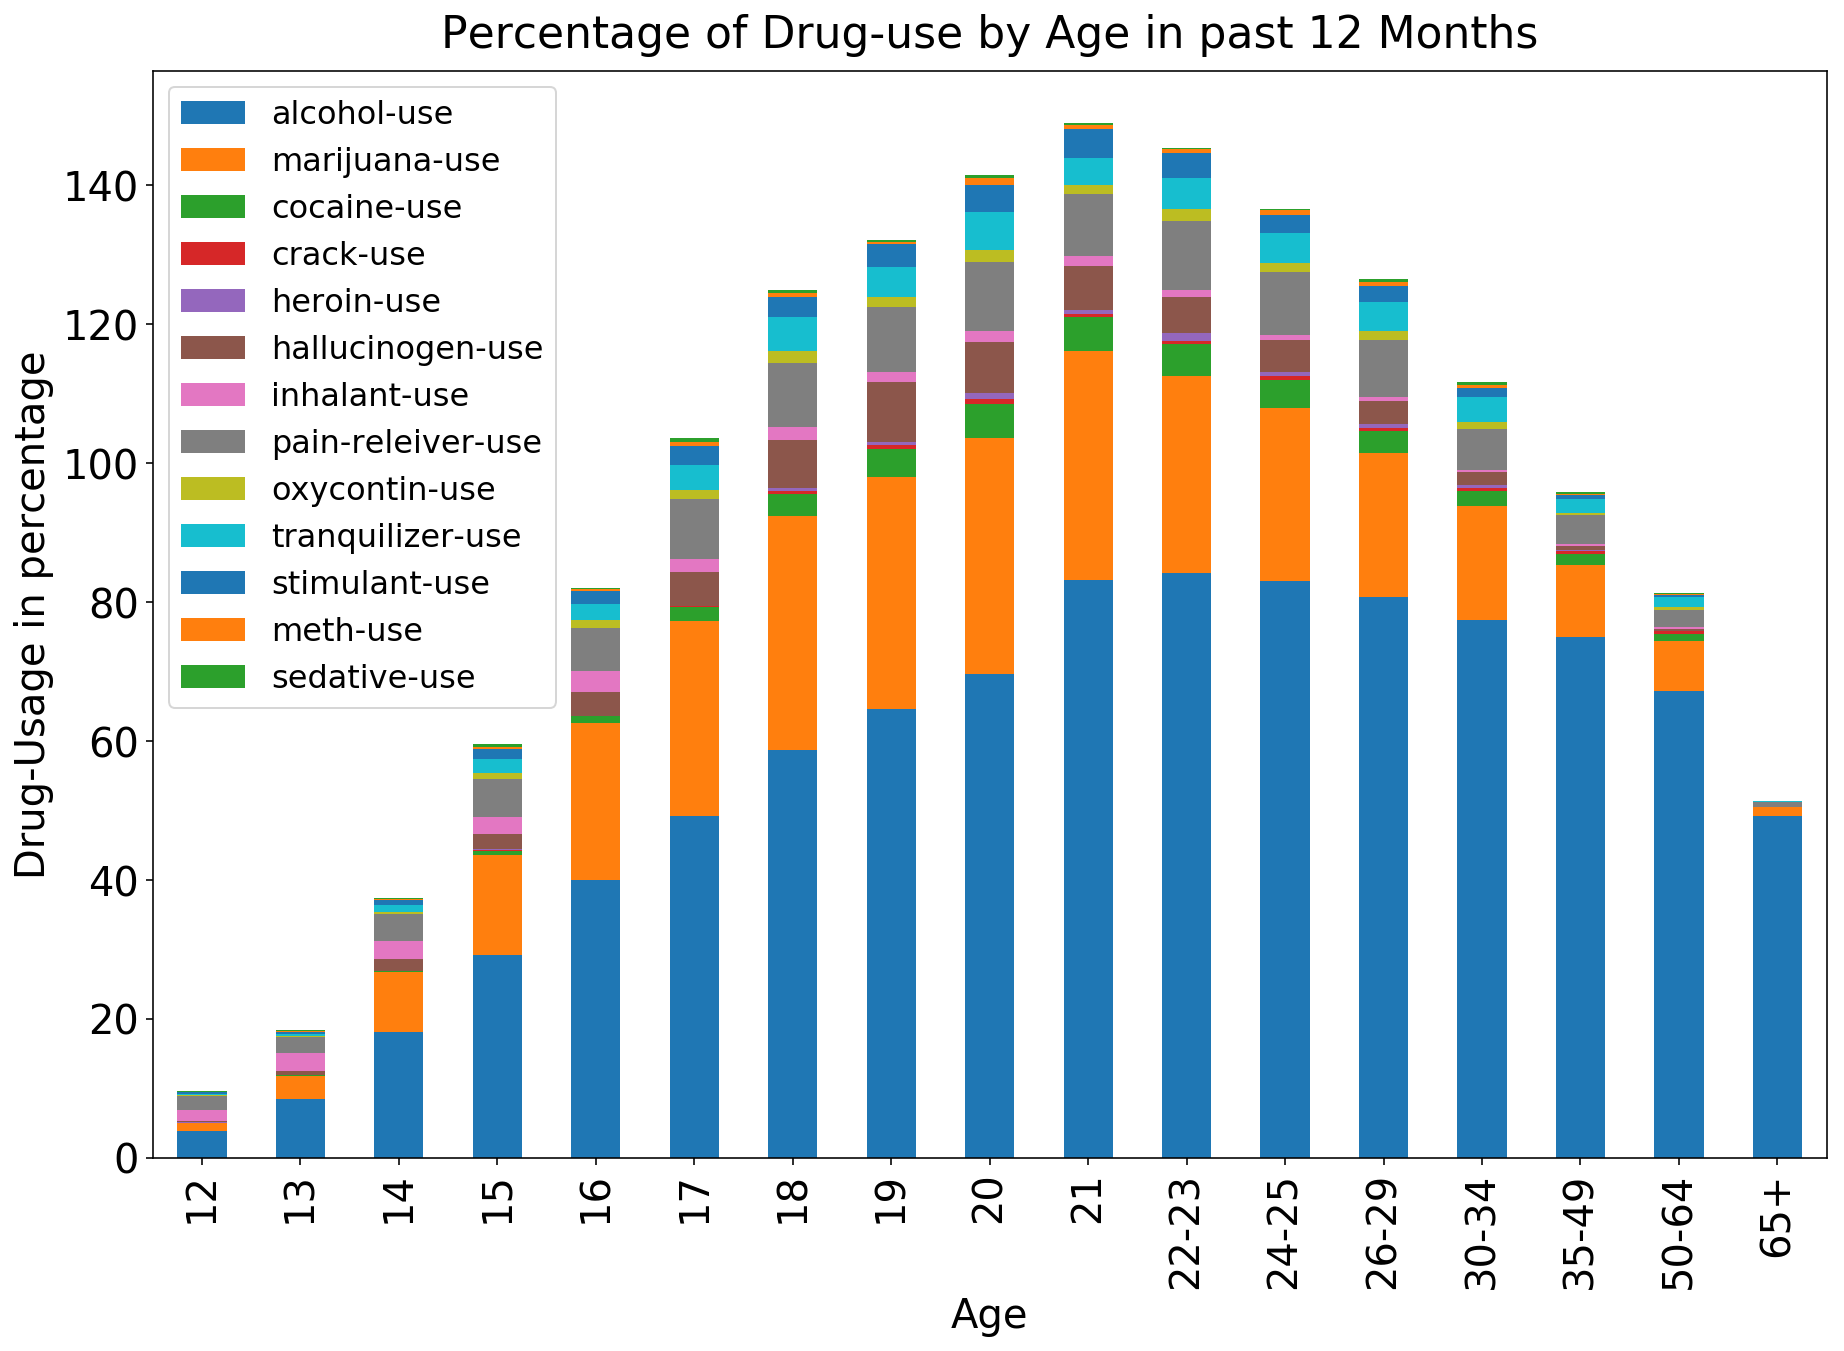

In [69]:
#Look at the percentage of drugs-use by Age groups in the past 12 months
ax = drugs_use.plot(x= 0, kind = 'bar', figsize = (15,10), stacked =True, 
                    fontsize =20)
ax.set_title('Percentage of Drug-use by Age in past 12 Months', fontsize=22, y=1.01)
ax.set_xlabel("Age", fontsize = 20)
ax.set_ylabel("Drug-Usage in percentage", fontsize=20)
ax.legend(fontsize =16)

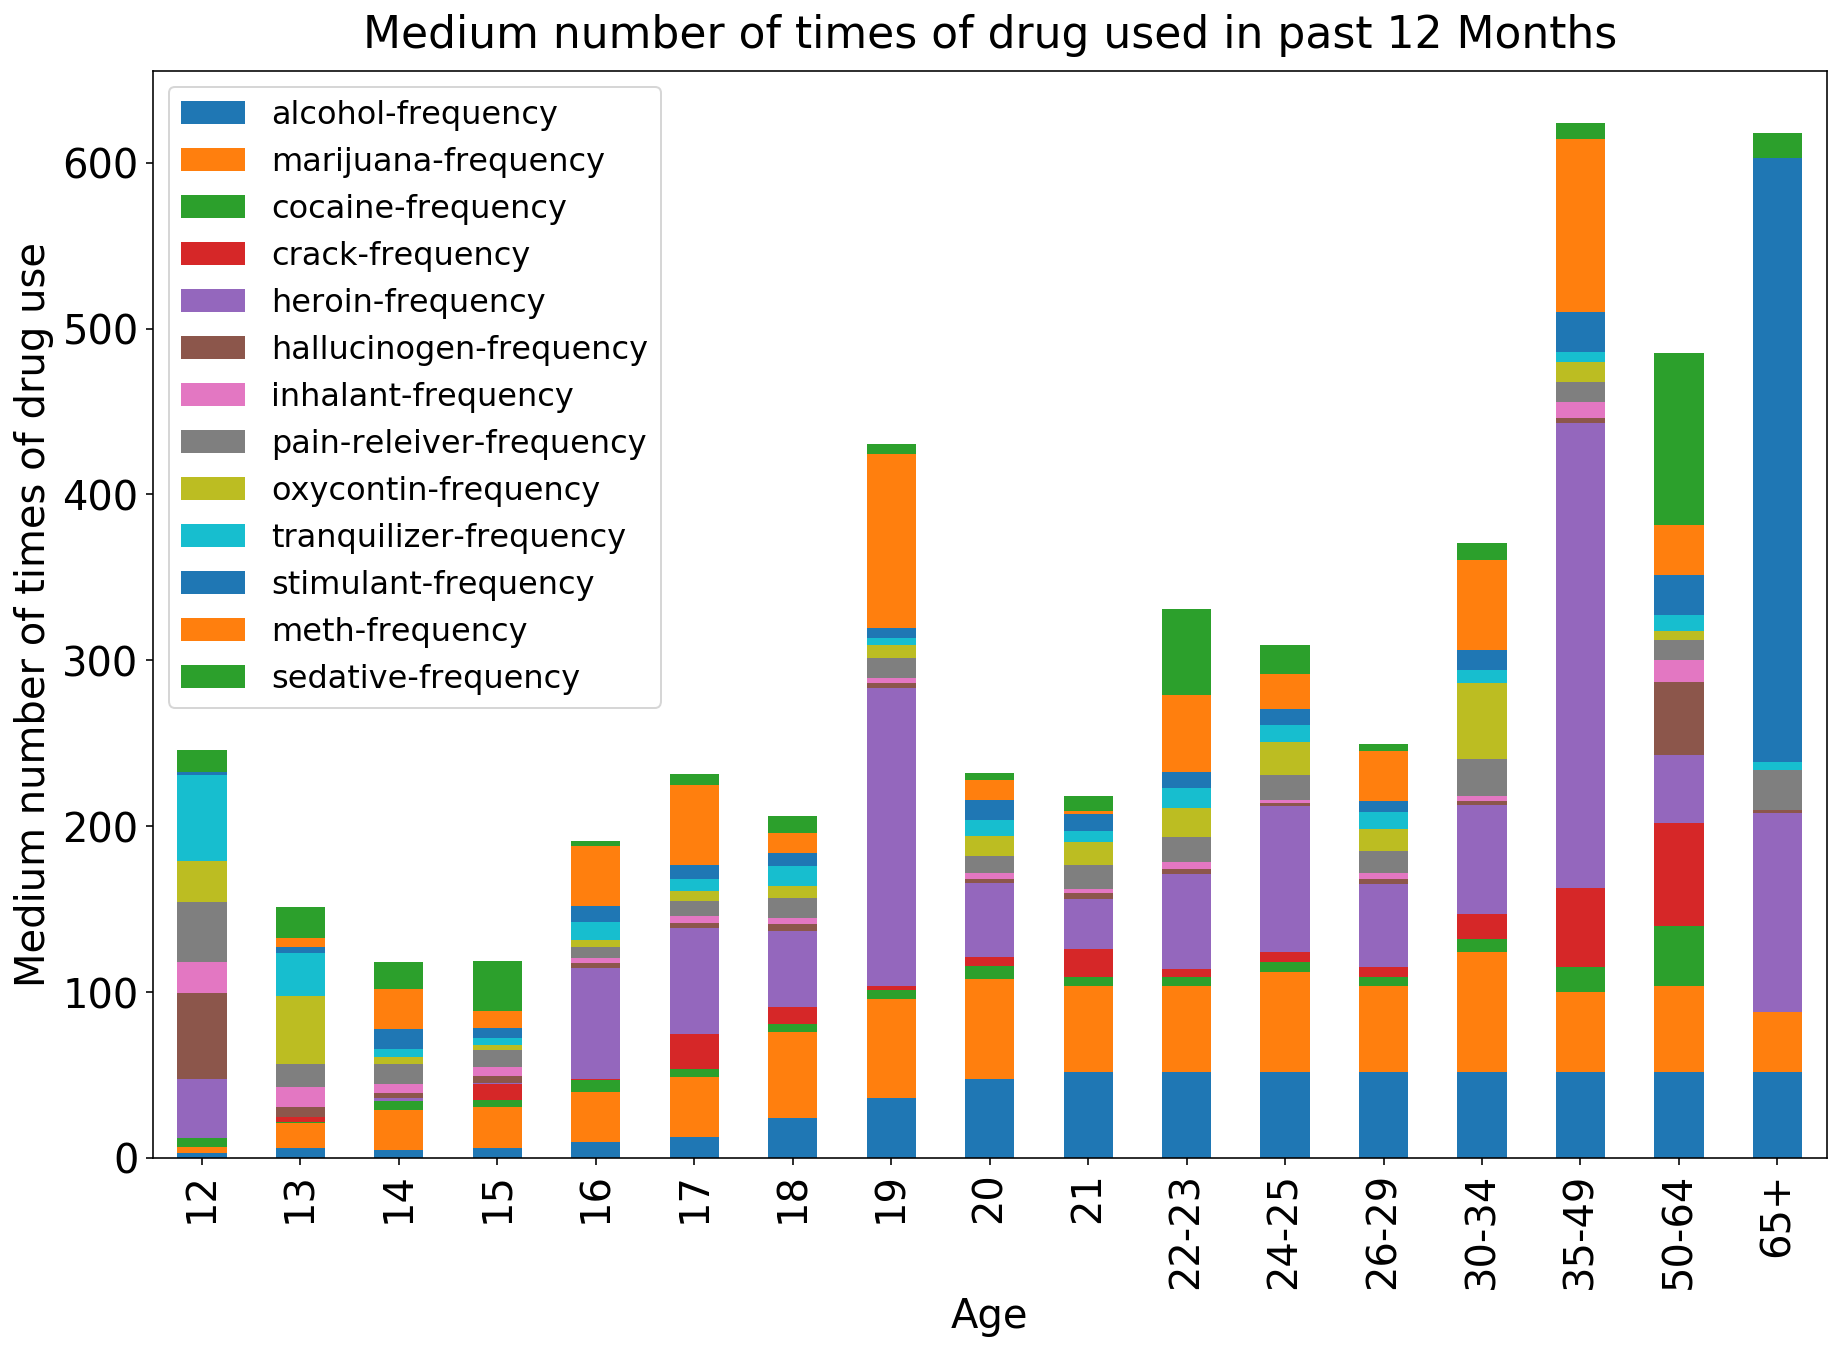

In [70]:
#Look at the frequency or Medium number of times that the drugs 
#were consumed by Age groups in the past 12 months

ax = drugs_freq.plot(x= 0, kind = 'bar', figsize = (15,10), stacked =True, 
                    fontsize =20)
ax.set_title('Medium number of times of drug used in past 12 Months', fontsize=22, y=1.01)
ax.set_xlabel("Age", fontsize = 20)
ax.set_ylabel("Medium number of times of drug use", fontsize=20)
ax.legend(fontsize =16)

## Insights:
#Chronic alcohol and marijuana abuse observed in young adults 
#and older adults, noting that there as much as 50 times of alcohol abuse per last 12 months.
#Possibly such behaviours germinate since age 12.
#Recommendations:
#1. Early intervention at age 12.
#2. Immediate measures required to tackle the age group 20 as
 there is a steep jump in the abuse from age 20 to 21. 

# 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [71]:
from scipy.stats import t

In [72]:
# H_0: mu_Alcohol_use = M_Alcohol_use
# H_1: mu_Alcohol_use < M_Alcohol_use

#Set alpha to 0.05
alpha = 0.05
alcohol = drugs_use['alcohol-use'].values

#Calculate the point estimate.
sample_mean = np.mean(alcohol)
sample_median =  np.median(alcohol)

#Calculate the test statistic.
t_statistic = (sample_mean - sample_median)/(np.std(alcohol, ddof=1)/len(alcohol)**0.5)

#Find the p-values
p_value = t.sf(np.abs(t_statistic), len(alcohol))
## Because our alternative hypothesis is greather than (rather than equal to),
## we DO NOT double our p-value. 

print("Our sample mean is {}".format(sample_mean))
print("Our sample median is {}".format(sample_median))
print("Our t-statistic is {}".format(t_statistic))
print("Our p-value is {}".format(p_value))

if p_value < alpha:
    print ("We reject our null hypothesis and conclude that the true mean Alcohol-use value is greater than the median Alcohol-use value.")
elif p_value > alpha:
    print ("We fail to reject our null hypothesis and cannot conclude that the true mean Alcohol-use value is less than the median.")
else:
    print ("Our test is inconclusive.")

Our sample mean is 55.42941176470588
Our sample median is 64.6
Our t-statistic is -1.4067298620678976
Our p-value is 0.08876288216565376
We fail to reject our null hypothesis and cannot conclude that the true mean Alcohol-use value is less than the median.


**Report**

#H_0: mu_Alcohol_use = M_Alcohol_use
#H_1: mu_Alcohol_use < M_Alcohol_use
P-value = 0.089 (> alpha)
We fail to reject our null hypothesis and cannot conclude that the true mean Alcohol-use value is less than the median, 

In [73]:
# H_0: There is no difference in the percentage of alcohol abuse in all ages (12 to 65+)
# H_1: Higher percentage of the population in age groups 20 and above have alcolol
# abuse than those in age group 19 and below.
#Divide the data to two groups
drugs_use_19 = drugs_use[0:8]   #12 to 19 years old
drugs_use_20 = drugs_use[8:17]   #20 to 65+
# We measure the means of 'alcohol-use' in the above two sub-groups

#Set alpha to 0.05
alpha = 0.05
alcohol1 = drugs_use_19['alcohol-use'].values
alcohol2 = drugs_use_20['alcohol-use'].values

#Calculate the point estimate.
sample_mean1 = np.mean(alcohol1)
sample_mean2 = np.mean(alcohol2)

print("Alcohol-abuse in Group1: (12-19 years old) mean: {}".format(round(sample_mean1,1)))
print("Alcohol-abuse in Group2: (20-65++ years old) mean: {}".format(round(sample_mean2,1)))
print("Difference in Alcohol-abuse (Group2 -Group1) : {}".format(round(sample_mean2-sample_mean1,1)))


Alcohol-abuse in Group1: (12-19 years old) mean: 34.0
Alcohol-abuse in Group2: (20-65++ years old) mean: 74.4
Difference in Alcohol-abuse (Group2 -Group1) : 40.4


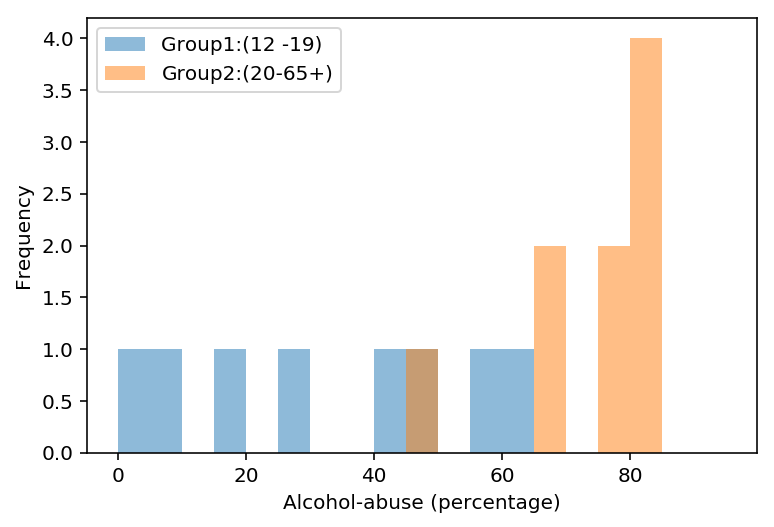

In [74]:
val,bins,_= plt.hist(alcohol1, bins=range(0,100,5), alpha=0.5, label='Group1:(12 -19)')
plt.hist(alcohol2, bins=range(0,100,5), alpha=0.5, label='Group2:(20-65+)')
plt.legend()
ax.set_title('Alcohol Abuse - Group1 vs. Group2')
plt.xlabel('Alcohol-abuse (percentage)')
plt.ylabel('Frequency')
plt.show()

In [75]:
p_value = stats.ttest_ind(alcohol1,alcohol2).pvalue
p_value = p_value/2 ## -tail test because our alternative hypothesis is greather than.
print(p_value)

0.0001371517250365497


In [76]:
#Report
print("p_value: {}".format(round(p_value,5)))
if p_value < alpha:
    print ("We reject our null hypothesis and conclude that there is higher alcohol-abuse in age group 20-65+ than that in age group 12 -19.")
elif p_value > alpha:
    print ("We fail to reject our null hypothesis and cannot conclude that there is higher alcohol-abuse in age group 20-65+ than that in age group 12 -19.")
else:
    print ("Our test is inconclusive.")

p_value: 0.00014
We reject our null hypothesis and conclude that there is higher alcohol-abuse in age group 20-65+ than that in age group 12 -19.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [77]:
print(satsdf['Rate'].describe())

IQR= 63.5 - 9 
print('IQR :{}'.format(IQR))
print('We deem values outside the range of : {} and {} as outliers?'.format(9.0-1.5 * IQR, 63.5 +1.5*IQR) ) #1.5 times of the interquatile range

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64
IQR :54.5
We deem values outside the range of : -72.75 and 145.25 as outliers?


In [78]:
#May be using 1.5 * IQR is not good as we see the range is too large and even into negative values.
ratedf = sorted (satsdf['Rate'])
print(ratedf)

[4, 4, 4, 5, 5, 6, 6, 7, 8, 8, 8, 9, 9, 9, 11, 11, 12, 12, 13, 13, 17, 18, 23, 26, 31, 33, 34, 45, 51, 51, 52, 53, 53, 54, 55, 56, 57, 60, 63, 65, 65, 67, 68, 69, 69, 71, 71, 72, 77, 79, 81, 82]


In [79]:
#Looking at the sorted 'Rate' data, it seems that there is no issue with the data, ie. no outliers.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [80]:
#Pearson correlation
satsdf[['Verbal', 'Math']].corr()

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


In [81]:
satsdf[['Verbal', 'Math']].corr(method ='spearman')
#Spearman correlation matrix shows a higher correlation values than 'Pearson' correlation matrix

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.